In [1]:
import plotly.express as px
import pandas as pd
#imported plotly.express and pandas

In [2]:
data=pd.read_excel("sentimentdataset_clean.xlsx")
#read the excel file

# 1. Yearly distribution of sentiments

In [3]:
sentiment_counts = data.groupby("Year")["General_Sentiment"].value_counts().unstack().fillna(0)
#Grouped the data by "Year" and counted the occurrences of values in the "General_Sentiment" column. `Unstack()` converts the grouped data into a wide format with each sentiment as a separate column.`Fillna(0)` replaces any missing values with 0.

In [4]:
data = data[data['Year'] >= 2016]
#filtered out dta that is older than 2016

In [5]:
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

fig = px.bar(
    sentiment_percentages,
    x=sentiment_percentages.index,
    y=sentiment_percentages.columns,
    title="Sentiment Distribution Across Years",
    labels={"value": "Percentage", "Year": "Year"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

#Calculates the percentage of each sentiment category for each month by dividing the count of each sentiment by the total count of all sentiments for that month and multiplying by 100 to convert it into a percentage.
#Create a bar plot using Plotly, with the x-axis showing the months and the y-axis showing the percentage distribution of sentiments, and display it with a pastel color scheme.

# 2. Monthly distribution of sentiments

In [6]:
sentiment_counts = data.groupby(["Month"])["General_Sentiment"].value_counts().unstack().fillna(0)

sentiment_melted = sentiment_counts.reset_index().melt(id_vars='Month', value_vars=sentiment_counts.columns)

#Grouped the data by "Month" and counts the occurrences values in the "General_Sentiment" column. `Unstack()` converts the grouped data into a wide format with each sentiment as a separate column.`Fillna(0)` replaces any missing values with 0.

#Resets the index of this wide-format DataFrame and then "melt" it into a long format, where each row corresponds to a specific month-sentiment combination.

In [7]:
data = data[data['Year'] >= 2016]
#filtered out data that is older than 2016

In [8]:
fig = px.bar(
    sentiment_melted,
    x='Month',
    y='value',
    color='General_Sentiment',
    title="Sentiment Distribution Across Months",
    labels={"value": "Count", "Month": "Month"},
    color_discrete_sequence=px.colors.sequential.Viridis,
    text='General_Sentiment'
)

fig.show()
#Generate a bar plot, where the x-axis represents the "Month" and the y-axis represents the count of sentiments. The bars are colored based on the "General_Sentiment" category, and the plot uses the Viridis color scheme.
#The `text='General_Sentiment'` option adds labels on each bar, showing the sentiment category.

# 3. Daily distribution of sentiments

In [9]:
sentiment_counts = data.groupby("Day")["General_Sentiment"].value_counts().unstack().fillna(0)
#Grouped the data by "Day" and counted the occurrences of values in the "General_Sentiment" column. `Unstack()` converts the grouped data into a wide format with each sentiment as a separate column.`Fillna(0)` replaces any missing values with 0.

In [10]:
data = data[data['Year'] >= 2016]
#filtered out data older than 2016

In [11]:
fig = px.bar(
    sentiment_counts,
    x=sentiment_counts.index,
    y=sentiment_counts.columns,
    title="Sentiment Distribution Across Days",
    labels={"value": "Count", "Day": "Day"},
    color_discrete_sequence=px.colors.qualitative.D3
)

fig.show()

#Sentiment distribution across days. The x-axis is the index, representing days, the y-axis is the sentiment count.
#The bars are colored using a discrete color sequence. The chart is shown using `fig.show()`.

In [12]:
import pandas as pd
import plotly.express as px

data['Weekday'] = pd.to_datetime(data['Timestamp']).dt.day_name()

ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Weekday'] = pd.Categorical(data['Weekday'], categories=ordered_weekdays, ordered=True)

sentiment_melted = data.groupby('Weekday')['General_Sentiment'].value_counts().unstack(fill_value=0).reset_index().melt(id_vars='Weekday')

sentiment_melted = sentiment_melted.sort_values('Weekday')

fig = px.bar(
    sentiment_melted,
    x='Weekday',
    y='value',
    color='General_Sentiment',
    title="Sentiment Distribution Across Weekdays",
    labels={"value": "Count", "Weekday": "Day of Week"},
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    text='General_Sentiment'
)

fig.show()

#'Timestamp' was converting to datetime and weekday names ware extracted
#Created a Monday-Sunday order in ordered_weekdays, then made sure Weekday is a categorical variable
#Grouped data by Weekday and General Sentiment, and melted for plotting
#Sorted by Weekday (categorical order)
#Create the bar plot with a different color palette (Pastel1)

# 4. Hourly distribution of sentiments

In [13]:
sentiment_counts = data.groupby("Hour")["General_Sentiment"].value_counts().unstack().fillna(0)
#Grouped the data by "Hour" and counted the occurrences of values in the "General_Sentiment" column.
#`Unstack()` converts the grouped data into a wide format with each sentiment as a separate column.`Fillna(0)` replaces any missing values with 0.

In [14]:
data = data[data['Year'] >= 2016]
#filtered out data older than 2016

In [15]:
fig = px.bar(
    sentiment_counts,
    x=sentiment_counts.index,
    y=sentiment_counts.columns,
    title="Sentiment Distribution Across Hours",
    labels={"value": "Count", "Hours": "Hours"},
    color_discrete_sequence=px.colors.qualitative.Dark24
)


fig.show()

#Created a bar chart of sentiments by hour, assigned labels and use the color palette Dark24

# Additional: Sentiments per platform

In [16]:
platform_sentiment_counts = data.groupby(['Platform', 'General_Sentiment']).size().reset_index(name='Count')
#The data is grouped by 'Platform' and 'General_Sentiment', counting occurrences of each sentiment per platform.

In [17]:
data = data[data['Year'] >= 2016]
#filtered out data older than 2016

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

platforms = platform_sentiment_counts['Platform'].unique()

cols = len(platforms)
rows = 1

fig = make_subplots(rows=rows, cols=cols, specs=[[{'type':'domain'}]*cols],
                    subplot_titles=platforms)

for i, platform in enumerate(platforms):
    platform_data = platform_sentiment_counts[platform_sentiment_counts['Platform'] == platform]
    row = 1
    col = i % cols + 1 
    
    fig.add_trace(
        go.Pie(
            labels=platform_data['General_Sentiment'],
            values=platform_data['Count'],
            name=platform
        ),
        row=row, col=col
    )

fig.update_layout(
    title_text='Sentiment Distribution Across Platforms',
    height=400,
)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

#This chart visualizes sentiment distribution across multiple platforms.
#The unique platforms are used to define the number of columns for the subplot grid, with one row.
#For each platform, a pie chart is generated, showing the proportions of sentiments using the sentiment counts as values.
#Each pie chart is added to the corresponding subplot.
#The layout is updated with a title and chart size, and the pie charts display the percentage and label inside each segment.

# Additional: Sentiments per county

In [19]:
import pandas as pd
import plotly.express as px
#Imported Pandas and Plotly.express

In [20]:
country_sentiment_counts = data.groupby(['Country', 'General_Sentiment']).size().reset_index(name='Count')
#The data is grouped by 'Country' and 'General_Sentiment', counting occurrences of each sentiment per country.

In [21]:
data = data[data['Year'] >= 2016]
#filtered out data older than 2016

In [22]:
fig = px.treemap(
    country_sentiment_counts,
    path=['Country', 'General_Sentiment'],
    values='Count',
    title='Sentiment Distribution by Country',
    color='General_Sentiment',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.show()
#This chart visualize sentiment distribution across different countries.
#The data, `country_sentiment_counts`, is organized using the `path` parameter to create a hierarchical structure.
#The first level represents countries and the second level represents general sentiments.
#The size of each block in the treemap is determined by the 'Count' column, while the colors represent different sentiments using the Set3 color sequence..
#The chart is titled "Sentiment Distribution by Country," and the treemap is displayed with `fig.show()`.

# Average number of likes compared to the sentiments

In [29]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [30]:
average_like_number = data.groupby('General_Sentiment')['Likes'].mean()

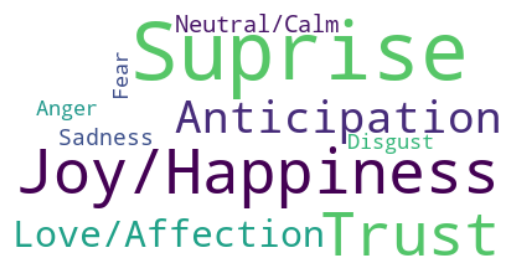

In [31]:
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(average_like_number.to_dict())

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

# Average number of retweets compared to the sentiments

In [32]:
average_retweet_number = data.groupby('General_Sentiment')['Retweets'].mean()

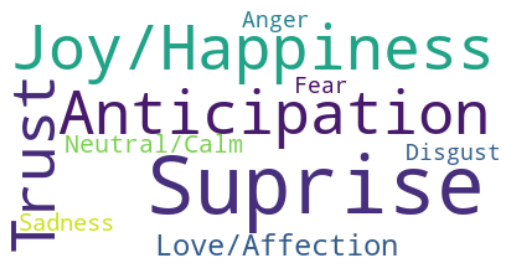

In [33]:
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(average_retweet_number.to_dict())

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

# Analysis of post content

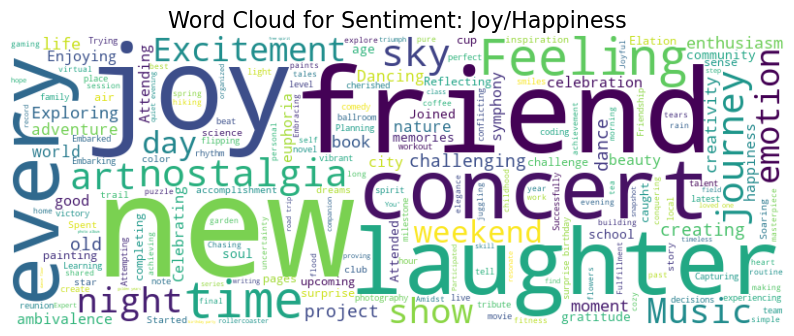

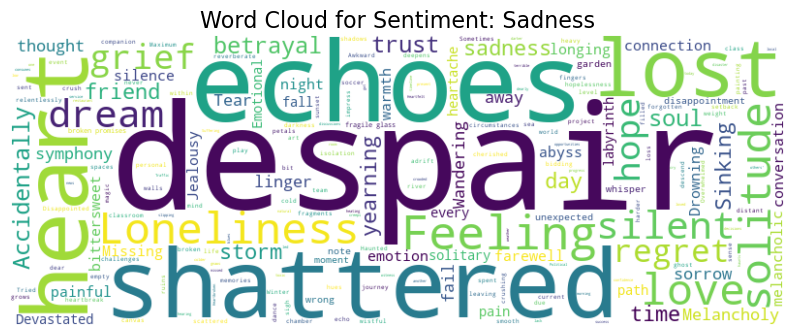

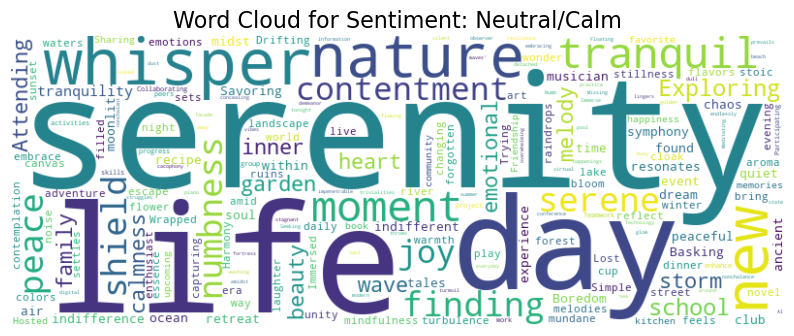

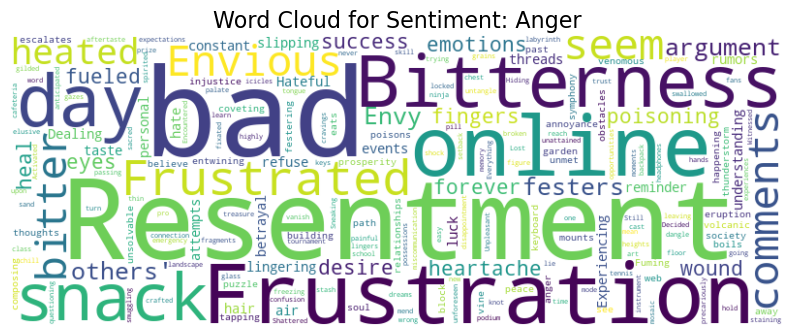

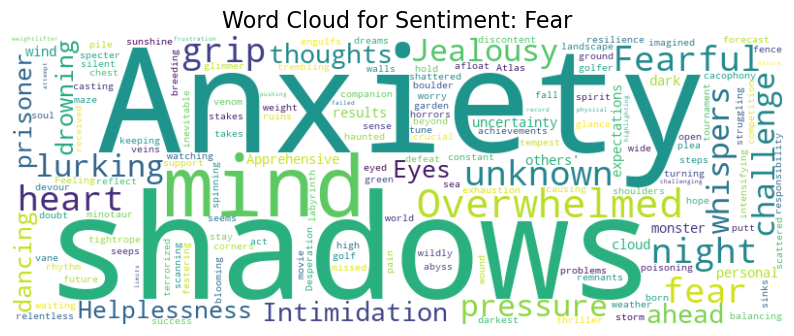

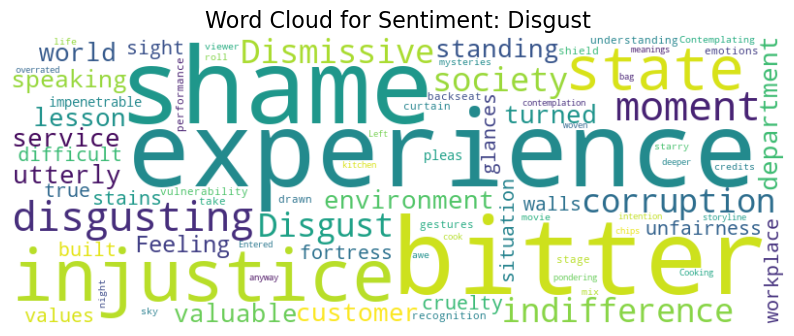

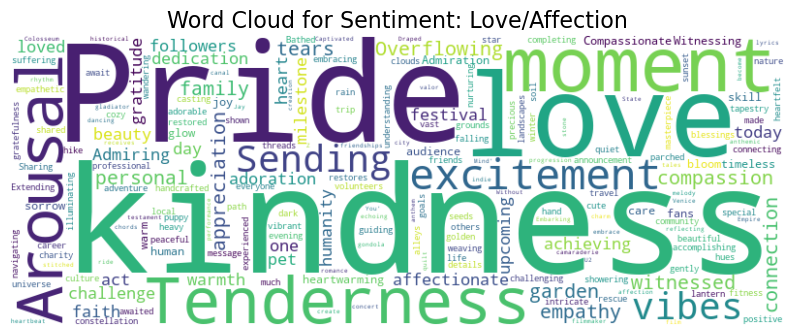

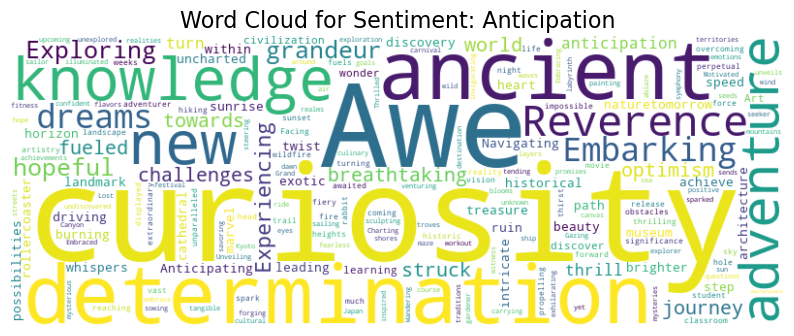

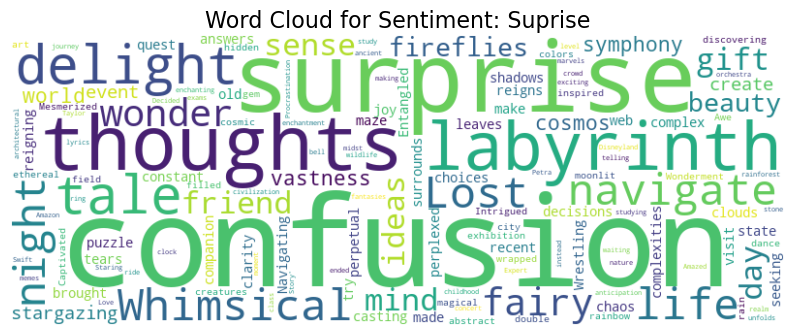

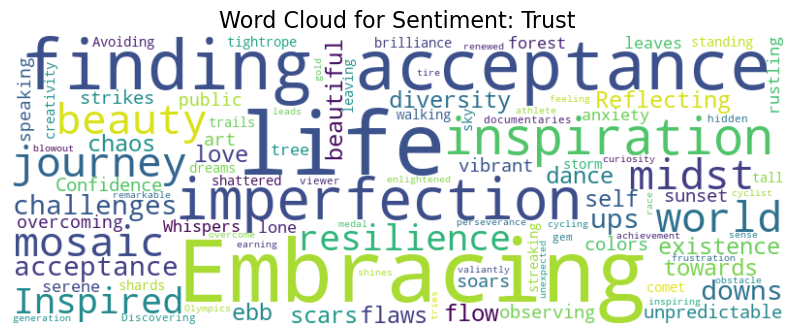

In [34]:
sentiments = data['General_Sentiment'].unique()

for sentiment in sentiments:
    
    text_data = data[data['General_Sentiment'] == sentiment]['Text']
    
    combined_text = ' '.join(text_data)
    
    wordcloud = WordCloud(width=800, height=300, background_color='white').generate(combined_text)
        
    plt.figure(figsize=(10, 5))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    
    plt.title(f'Word Cloud for Sentiment: {sentiment}', fontsize=16)
    
    plt.axis('off')
    
    plt.show()